In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

A l’aide d’un notebook ou d’une webapp, analyser les jeux de données récupérés :
○   Combien d’athlètes français ont été médaillés dans l’histoire des JO ?
○   Quels sont les plus grands athlètes français dans l’histoire des JO ?
○   Comment se classe la France dans l’histoire des JO ?
○   Quels sont les pays qui ont le plus gagné par discipline ?
○   Quels sont les athlètes qui ont le plus gagné de médailles dans l’histoire des JO ?


In [15]:
data = pd.read_csv('Data/Olympic_Games_Medal_Tally.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


In [16]:
country_medals = data.sort_values(by='total', ascending=False)
country_medals.head(20)

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
30,1904 Summer Olympics,3,1904,United States,USA,80,85,83,248
559,1980 Summer Olympics,20,1980,Soviet Union,URS,80,69,46,195
595,1984 Summer Olympics,21,1984,United States,USA,83,61,30,174
38,1908 Summer Olympics,5,1908,Great Britain,GBR,56,51,39,146
642,1988 Summer Olympics,22,1988,Soviet Union,URS,55,31,46,132
560,1980 Summer Olympics,20,1980,East Germany,GDR,47,37,42,126
518,1976 Summer Olympics,19,1976,Soviet Union,URS,49,41,35,125
1164,2016 Summer Olympics,59,2016,United States,USA,46,37,38,121
1250,2020 Summer Olympics,61,2020,United States,USA,39,41,33,113
694,1992 Summer Olympics,23,1992,Unified Team,EUN,45,38,29,112


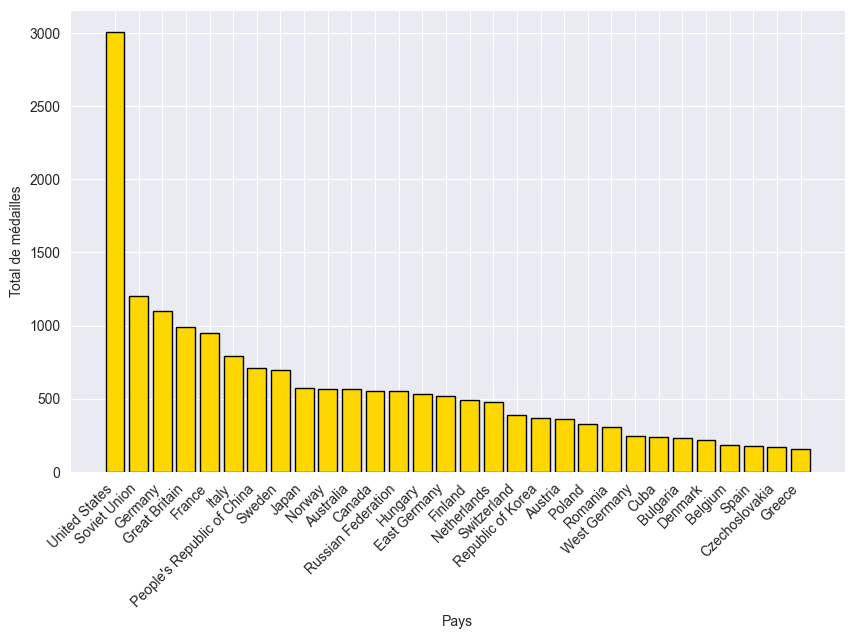

In [17]:
country_medal_data = data.groupby('country')['total'].sum().reset_index().sort_values(by='total', ascending=False)
top30_country = country_medal_data.head(30)

plt.figure(figsize=(10, 6))
plt.bar(top30_country['country'], top30_country['total'], color='gold', edgecolor='black')
plt.xlabel('Pays')
plt.ylabel('Total de médailles')
plt.xticks(rotation=45, ha='right')
plt.show()

On peut constater que la France occupe la 5éme place au nombre de médailles, avec un total de 950 médailles. Ceci est le nombre total de médailles, et ne prends donc pas en compte l'importance de la médaille (or, bronze ou argent).

In [18]:
athlete_data = pd.read_csv('Data/Olympic_Athlete_Event_Results.csv')
athlete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314907 entries, 0 to 314906
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      314907 non-null  object
 1   edition_id   314907 non-null  int64 
 2   country_noc  314907 non-null  object
 3   sport        314907 non-null  object
 4   event        314907 non-null  object
 5   result_id    314907 non-null  int64 
 6   athlete      314907 non-null  object
 7   athlete_id   314907 non-null  int64 
 8   pos          314907 non-null  object
 9   medal        314907 non-null  object
 10  isTeamSport  314907 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.3+ MB


In [19]:
athlete_data['total_medaille'] = athlete_data['medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1, 'na':0}).fillna(0)

athlete_medals = athlete_data.groupby('athlete_id').agg({
    'athlete': 'first',
    'country_noc': 'first',
    'total_medaille': 'sum'
}).reset_index().sort_values(by='total_medaille', ascending=False)


athlete_with_medal = athlete_medals[athlete_medals['total_medaille'] >= 1]

athlete_with_medal.head(40)


,athlete_id,athlete,country_noc,total_medaille
92532,93860,Michael Phelps,USA,28
28978,29198,Larisa Latynina,URS,18
30992,31235,Nikolay Andrianov,URS,15
99573,101008,Marit Bjørgen,NOR,15
82926,84154,Ole Einar Bjørndalen,NOR,13
22503,22677,Edoardo Mangiarotti,ITA,13
30371,30611,Takashi Ono,JPN,13
31024,31267,Boris Shakhlin,URS,13
107989,109767,Ireen Wüst,NED,13
11442,11503,Isabell Werth,GER,12


Voici ci dessus la liste des athlètes ayant gagnés le plus de médaille aux JO, tout pays confondu.

Ensuite, nous allons nous interesser aux athlétes francais.

In [20]:
french_athletes = athlete_with_medal[athlete_with_medal['country_noc']=='FRA']
french_athletes.head(25)

,athlete_id,athlete,country_noc,total_medaille
21689,21846,Roger Ducret,FRA,8
21616,21772,Philippe Cattiau,FRA,8
116500,118554,Martin Fourcade,FRA,7
21607,21763,Géo Buchard,FRA,6
21864,22022,Philippe Riboud,FRA,6
21863,22021,Daniel Revenu,FRA,6
21680,21837,Christian d'Oriola,FRA,6
21717,21874,Lucien Gaudin,FRA,6
21823,21980,Christian Noël,FRA,5
12130,12196,André Jousseaumé,FRA,5


Voici la liste des athlètes Francais les plus médaillés des JO.

In [21]:
french_athletes.count()

athlete_id        1434
athlete           1434
country_noc       1434
total_medaille    1434
dtype: int64

Par rapport aux nombres de lignes de ce dataframe qui regroupe tout les athlètes francais médaillés, nous pouvons voir qu'il y a 1434 athlètes Francais qui ont été médaillés.

In [22]:
country_discipine = athlete_data.groupby('country_noc').agg({
    'sport': 'first',
    'total_medaille': 'sum'
}).reset_index().sort_values(by='total_medaille', ascending=False)


country_with_medal = country_discipine[country_discipine['total_medaille'] >= 1]


country_discipine.head(40)

,country_noc,sport,total_medaille
217,USA,Athletics,6273
215,URS,Artistic Gymnastics,2543
81,GER,Artistic Gymnastics,2437
76,GBR,Artistic Gymnastics,2367
71,FRA,Artistic Gymnastics,1968
102,ITA,Athletics,1746
36,CAN,Athletics,1668
194,SWE,Artistic Gymnastics,1654
12,AUS,Athletics,1490
147,NED,Archery,1239


Nous avons ici le total de médailles par pays et par discipline. Nous pourrions aussi afficher chaque discipline une par une, puisqu'ici chaque discipline est mélangée.

In [23]:
Athletics_medal = country_discipine[country_discipine['sport']=='Athletics']
Athletics_medal.head(15)

,country_noc,sport,total_medaille
217,USA,Athletics,6273
102,ITA,Athletics,1746
36,CAN,Athletics,1668
12,AUS,Athletics,1490
41,CHN,Athletics,1192
151,NOR,Athletics,1189
106,JPN,Athletics,1126
111,KOR,Athletics,745
153,NZL,Athletics,299
94,IND,Athletics,260


Ensuite, je vais pouvoir charger un fichier csv, le transformer en ne gardant que les colonnes utiles pour les prédictions et changer certaines pour plus de lisibilité, et en enfin enregistrer le fichier nettoyer afin de pouvoir l'ajouter en bdd. Pour l'analyse des predictions, je ne vais garder que les medailles pour les JO d'été afin de garder une cohérence dans les résultats obtenu (le nombre de medailles et les pays vainqueurs pouvant être différent d'une version à l'autre).

Voici un exemple pour le total de médaille par pays, par discipline. Ici c'est l'athlétisme qui a été choisi, mais il suffit de changer la valeur pour obtenir le total voulue sur une autre discipline.

In [24]:
data_to_change = pd.read_csv('Data/Olympic_Athlete_Event_Results.csv')
data_to_change.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False


In [25]:
data_to_keep = data_to_change[data_to_change['edition'].str.contains('Summer', case=False)]
data_to_keep['total_medaille'] = data_to_keep['medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1, 'na':0}).fillna(0)
data_to_keep['edition'] = data_to_keep['edition'].dropna()


data_to_keep['edition'] = data_to_keep['edition'].str[:4]

data_to_keep = data_to_keep.drop(['edition_id', 'result_id', 'pos', 'isTeamSport'], axis=1)


data_to_keep.to_csv('data_athlete_prediction.csv', index=True )
data_to_keep.head(50)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2384\1620665976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_keep['total_medaille'] = data_to_keep['medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1, 'na':0}).fillna(0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2384\1620665976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_keep['edition'] = data_to_keep['edition'].dropna()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2384\1620665976.py:6: SettingWithCopyWarning: 
A value is trying to be s

,edition,country_noc,sport,event,athlete,athlete_id,medal,total_medaille
0,1908,ANZ,Athletics,"100 metres, Men",Ernest Hutcheon,64710,na,0
1,1908,ANZ,Athletics,"400 metres, Men",Henry Murray,64756,na,0
2,1908,ANZ,Athletics,"800 metres, Men",Harvey Sutton,64808,na,0
3,1908,ANZ,Athletics,"800 metres, Men",Guy Haskins,922519,na,0
4,1908,ANZ,Athletics,"800 metres, Men",Joseph Lynch,64735,na,0
5,1908,ANZ,Athletics,"800 metres, Men",Henry Murray,64756,na,0
6,1908,ANZ,Athletics,"1,500 metres, Men",Joseph Lynch,64735,na,0
7,1908,ANZ,Athletics,"1,500 metres, Men",Charles Swain,79576,na,0
8,1908,ANZ,Athletics,"1,500 metres, Men",Guy Haskins,922519,na,0
9,1908,ANZ,Athletics,"1,500 metres, Men",George Blake,64619,na,0


In [26]:
country_file = pd.read_csv('Data/olympic_games.csv')
country_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          1781 non-null   int64 
 1   games_type    1781 non-null   object
 2   host_country  1781 non-null   object
 3   host_city     1781 non-null   object
 4   athletes      1781 non-null   int64 
 5   teams         1781 non-null   int64 
 6   competitions  1781 non-null   int64 
 7   country       1781 non-null   object
 8   gold          1781 non-null   int64 
 9   silver        1781 non-null   int64 
 10  bronze        1781 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 153.2+ KB


In [27]:
country_file['total_medaille'] = country_file['gold'] + country_file['silver']+country_file['bronze']
country_file = country_file[country_file['games_type']=='Summer']
country_file.to_csv('data_country_prediction.csv', index=True )
country_file.head(15)

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze,total_medaille
29,2020,Summer,Japan,Tokyo,11420,206,339,Argentina,0,1,2,3
30,2020,Summer,Japan,Tokyo,11420,206,339,Armenia,0,2,2,4
31,2020,Summer,Japan,Tokyo,11420,206,339,Australia,17,7,22,46
32,2020,Summer,Japan,Tokyo,11420,206,339,Austria,1,1,5,7
33,2020,Summer,Japan,Tokyo,11420,206,339,Azerbaijan,0,3,4,7
34,2020,Summer,Japan,Tokyo,11420,206,339,Bahamas,2,0,0,2
35,2020,Summer,Japan,Tokyo,11420,206,339,Bahrain,0,1,0,1
36,2020,Summer,Japan,Tokyo,11420,206,339,Belarus,1,3,3,7
37,2020,Summer,Japan,Tokyo,11420,206,339,Belgium,3,1,3,7
38,2020,Summer,Japan,Tokyo,11420,206,339,Bermuda,1,0,0,1
